In [1]:
import matplotlib.pyplot as plt

from neuron import h
h.load_file('stdrun.hoc')

1.0

In [2]:
h.load_file("seg/template.hoc")
cell = h.Spiker_Izhikevich_seg()

In [7]:
cell.soma[0](0.5).cm

1.20784285

In [3]:
# CI
ci = h.IClamp(cell.soma[0](0.5))
ci.amp = 0.1 # (nA)
ci.delay = 50
ci.dur = 150

# V recording
v = h.Vector().record(cell.soma[0](0.5)._ref_v)

In [4]:
cell.soma[0](0.5).cm

1.20784285

In [6]:
h.tstop = 200
h.dt = 0.1
h.steps_per_ms = 1 / h.dt
h.v_init = -50

In [7]:
h.run()

0.0

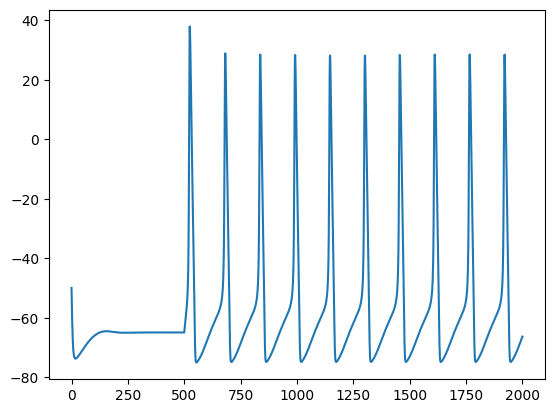

In [29]:
plt.plot(v.as_numpy())